Chelsea Jaculina

DATA 255 Assignment #1

September 15, 2025

## Import Required Libraries

In [203]:
import csv # library to read csv files
import torch # PyTorch to store numbers and perform math operations
import matplotlib.pyplot as plt # to plot and visualize images

##1. Display the Sample Images

Load MNIST CSV files

In [204]:
def load_mnist_csv(filename, num_samples=None):
    data = [] # list to store label and pixels as tuples
    with open(filename, 'r') as f: # open csv file on read
        reader = csv.reader(f)
        next(reader)  # skip header
        for i, row in enumerate(reader):
            if num_samples and i >= num_samples: # if a sample limit is provide, stop loop through each row in file
                break
            row = list(map(int, row)) # convert all string values to integers in row
            label = row[0] # first row is the label (0 or 1)
            pixels = row[1:] # remaining 784 values are the pixel values for image
            data.append((label, pixels)) # store the label and pixel as a tuple in list
    return data

In [193]:
# load training data from csv file
train_samples = load_mnist_csv("/content/drive/MyDrive/MSDA 2024-2026/04 Fall 2025/DATA 255 - Deep Learning/mnist_train_binary.csv")

# load test data from csv file
test_samples  = load_mnist_csv("/content/drive/MyDrive/MSDA 2024-2026/04 Fall 2025/DATA 255 - Deep Learning/mnist_test_binary.csv")

print(f"Loaded {len(train_samples)} training samples successfully")
print(f"Loaded {len(test_samples)} test samples successfully")


Loaded 11339 training samples successfully
Loaded 1850 test samples successfully


Load the dataset from the csv files and display the sample images as shown in Fig.1.

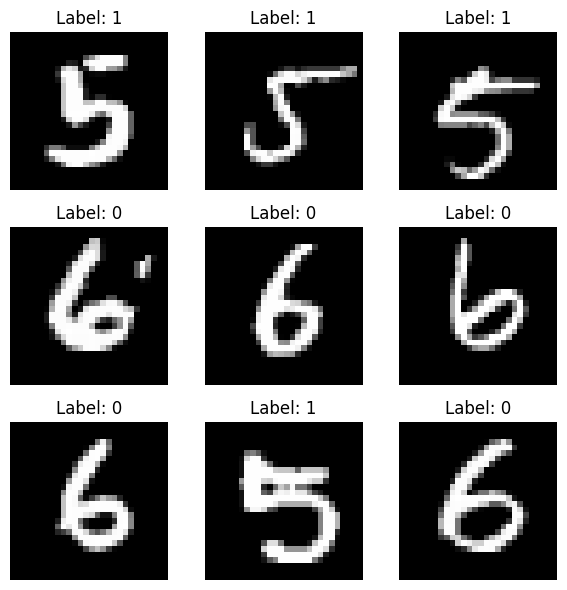

In [194]:
plt.figure(figsize=(6, 6))
for i, (label, pixels) in enumerate(train_samples[:9]):
    image = torch.tensor(pixels, dtype=torch.float32).reshape(28, 28)
    plt.subplot(3, 3, i + 1)
    plt.imshow(image, cmap="gray")
    plt.title(f"Label: {label}")
    plt.axis("off")
plt.tight_layout()
plt.show()

##2. Build Neural Network

In [195]:
# define sigmoid function from scratch
def sigmoid(x):
    return 1 / (1 + torch.exp(-x))

In [196]:
input_size = 784 # number of input neurons (28 * 28)
hidden_size = 100 # number of hidden layer neurons
output_size = 1 # # number of output neurons (binary classification: 0 or 1)

In [197]:
torch.manual_seed(0) # set seed for random number generation

# set 784 input neurons to connect to 100 hidden neurons
w1 = torch.randn((input_size, hidden_size), dtype=torch.float32, requires_grad=True)

# set 100 hidden neurons connect to 1 output neuron
w2 = torch.randn((hidden_size, output_size), dtype=torch.float32, requires_grad=True)

# set bias for each of the 100 hidden layer neurons
b1 = torch.randn((hidden_size,), dtype=torch.float32, requires_grad=True)  # one bias per hidden neuron

# set bias for the output neuron
b2 = torch.randn((output_size,), dtype=torch.float32, requires_grad=True)  # one bias for the output neuron

# confirm shapes
print("Weight matrix from input layer to hidden layer: ", w1.shape)
print("Weight matrix from hidden layer to output layer:", w2.shape)

Weight matrix from input layer to hidden layer:  torch.Size([784, 100])
Weight matrix from hidden layer to output layer: torch.Size([100, 1])


In [198]:
# define forward feed pass function
def forward(x):
    # set linear transformation from input layer to hidden layer
    z1 = x @ w1 + b1

    # apply sigmoid activation to hidden layer output
    a1 = sigmoid(z1) # hidden layer activation

    # set linear transformation from hidden layer to output layer
    z2 = a1 @ w2 + b2

    # apply sigmoid activation to get output layer activiation
    a2 = sigmoid(z2)

    return a1, a2

print("Neural network successfully initialized with weights.")

Neural network successfully initialized with weights.


## 3. Calculate a^[2]

In [199]:
batch_pixels = [] # list for pixels
batch_labels = [] # list for labels

# use the first 64 samples from training data set
for label, pixels in train_samples[:64]:
    # convert the list of 784 pixel values and normalize them to [0, 1] to train faster and for more stability
    batch_pixels.append(torch.tensor(pixels, dtype=torch.float32) / 255.0)

    # convert the label (0 or 1) to a shape of 1
    batch_labels.append(torch.tensor([label], dtype=torch.float32))

x = torch.stack(batch_pixels)
y = torch.stack(batch_labels)

print(f"x shape: {x.shape}")
print(f"y shape: {y.shape}")

x shape: torch.Size([64, 784])
y shape: torch.Size([64, 1])


In [200]:
# perform a forward pass to compute activation for hidden layer (a1) and output layer (a2)
a1, a2 = forward(x)

In [201]:
# x: 64 images, each flattened to 784 pixel values (28x28)
print(f"Input batch x shape: {x.shape}")  # [64, 784]

# w1: weights connecting 784 input pixels to 100 hidden units
print(f"W1 shape: {w1.shape}")  # [784, 100]

# a1: hidden layer output after sigmoid, one row per image
print(f"Hidden layer a1 shape: {a1.shape}")  # [64, 100]

# w2: weights from 100 hidden units to 1 output unit
print(f"W2 shape: {w2.shape}")  # [100, 1]

# a2: final output — one sigmoid value per image
print(f"Output layer a2 shape: {a2.shape}")  # [64, 1]

Input batch x shape: torch.Size([64, 784])
W1 shape: torch.Size([784, 100])
Hidden layer a1 shape: torch.Size([64, 100])
W2 shape: torch.Size([100, 1])
Output layer a2 shape: torch.Size([64, 1])


Calculate a[2] for the first 64 samples from the train set and print them out.

In [202]:
print("a^[2] values for first 64 samples:")
for i in range(a2.shape[0]):
    print(f"{a2[i].item():.4f}", end=" ")
    if (i + 1) % 8 == 0:
        print()
print()

a^[2] values for first 64 samples:
0.8133 0.0002 0.9979 0.9805 0.8663 0.9970 0.5723 0.3195 
0.0617 0.0010 0.6524 0.8307 0.3545 0.9701 0.9991 0.1642 
0.1425 0.0869 0.6445 0.6767 0.0024 0.0352 0.0117 0.0008 
0.0044 0.9915 0.8821 0.0098 0.9642 0.0193 0.9465 0.4744 
0.9609 0.6980 0.1000 0.0009 0.9460 0.0035 0.9968 0.9172 
0.3195 0.0426 0.1549 0.7853 0.0362 0.0821 0.5978 0.9784 
0.9156 0.2269 0.2211 0.2656 0.8224 0.9933 0.0004 0.3640 
0.8869 0.7098 0.6084 0.0023 0.6392 0.9970 0.0245 0.7572 

